## Imports

Begin by importing the required libraries.

In [1]:
!pip install sklearn
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt

Import the generated dataset.

In [3]:
data = pd.read_csv("../datasets/CPart2-Hybrid-1.csv", header=0)

data.head()

,Threshold Size,Key comparisons,Execution time
0,1,159152093,3.006
1,6,160166986,2.574
2,11,165475226,2.436
3,16,165478937,2.403
4,21,181400060,2.359


## Empirical Analysis

In C(ii), we set the **array size** to be equal to 10000000. 
We also set the range of threshold to be within 100, since larger values will cause the time complexity to approach O(*n*<sup>2</sup>), which will take a long time.

Plot the number of key comparisons against threshold size.

<AxesSubplot:xlabel='Threshold Size', ylabel='Key comparisons'>

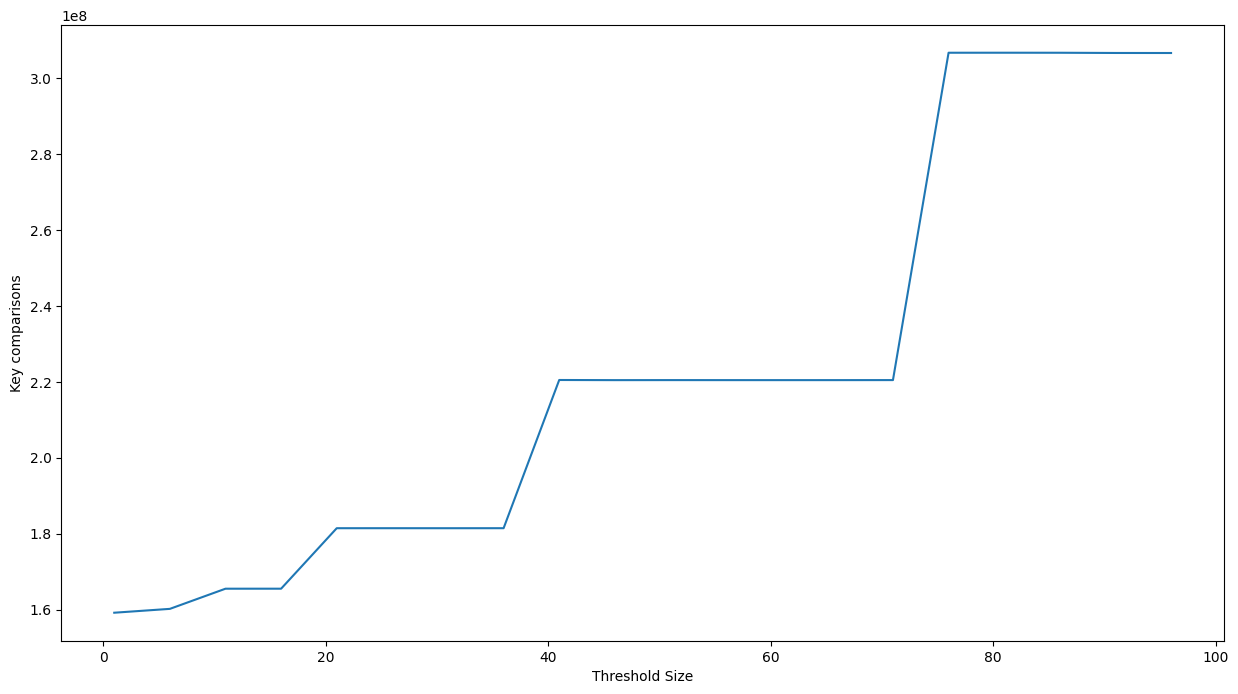

In [4]:
fig = plt.gcf()
fig.set_size_inches(15, 8)

sb.lineplot(data, x="Threshold Size", y="Key comparisons")

Plot the execution time against the array size.

<AxesSubplot:xlabel='Threshold Size', ylabel='Execution time'>

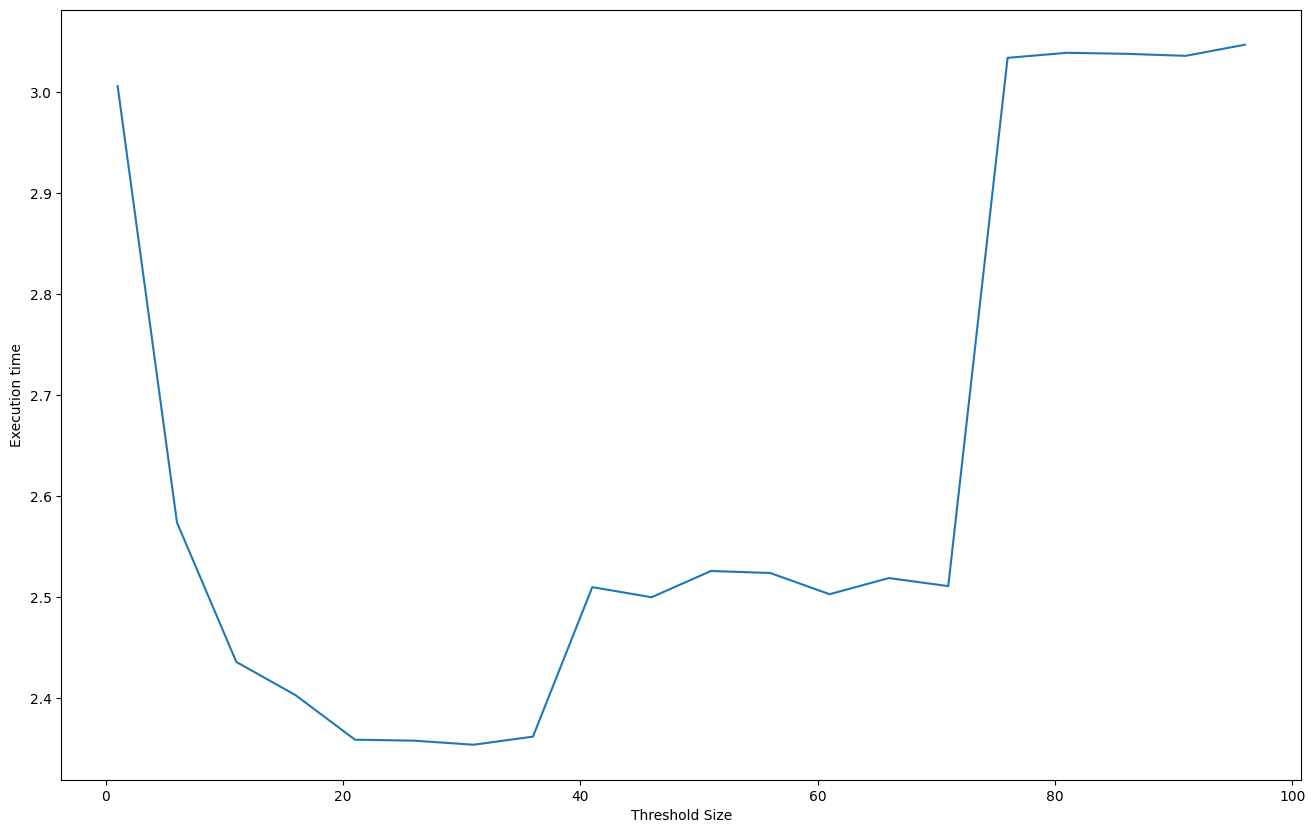

In [5]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data, x="Threshold Size", y="Execution time")

## Theoretical Analysis

From C(i) we have determined that for the hybrid Merge-Insertion Sort algorithm:

> The total time complexity for best-case analysis is: θ (*n* + *n* *log* (*n*/*s*)).
> <br>
> The total time complexity for worst and average-case analysis is: θ (*ns* + *n* *log* (*n*/*s*))

With the value of *n* fixed, the time complexity is simplified to θ (*log* *s*) for best-case and θ (*s* - *log* *s*) = θ (*s*) for average and worst-case. We consider only the average and worst-case here.

The plot of number of key comparisons against the threshold size *s* presents a staircase pattern. This can be explained as follows:

>Consider an array of size *n*, and set the threshold to be *s* = *n*/*k*. The following binary tree structure illustrates the top-down approach of *mergesort* method.

> <img src="Illustration.png">


When the *mergesort* method splits the array into *k* *n*/*k*-sized subarrays, the Insertion Sort method is called since the array size is now ≤ *s*.

Now suppose we change the value of *s* to be such that 2*n*/*k* < *s* < *n*/*k*. Notice that since subarray of size 2*n*/*k* is bigger than *s*, the Insertion Sort algorithm will still be called on the level of array size *n*/*k*.

Now suppose we change the value of *s* to be 2*n*/*k*. Then, the Insertion Sort aalgorithm will be invoked on the level of array size 2*n*/*k* instead. 

This shows that whenever the value of *s* is strictly between the array size of two adjacent levels in the binary tree structure, the number of Insertion Sort method called is approximately the same (*approximately* due to random dataset) => the number of key comparisons is approximately the same. 

This explains the staircase pattern shown in the plot, where the **leveled** region is when 2*n*/*k* ≤ *s* ≤ *n*/*k* and the **spike** region is when *s* = 2*n*/*k* or *s* = *n*/*k*.

Following our evaluation, if we plot the comparison plot using values of *s* for all *s* in the set {*s* | *s* = *n*/2<sup>*k*</sup>} instead, the plot will then show a linear-time graph, as predicted in the time complexity analysis of θ (*s*).

In [6]:
data2 = pd.read_csv("../datasets/CPart2-Hybrid-2.csv", header=0)

data2.head()

FileNotFoundError: [Errno 2] No such file or directory: 'CPart2-Hybrid-2.csv'

<AxesSubplot:xlabel='Threshold Size', ylabel='Key comparisons'>

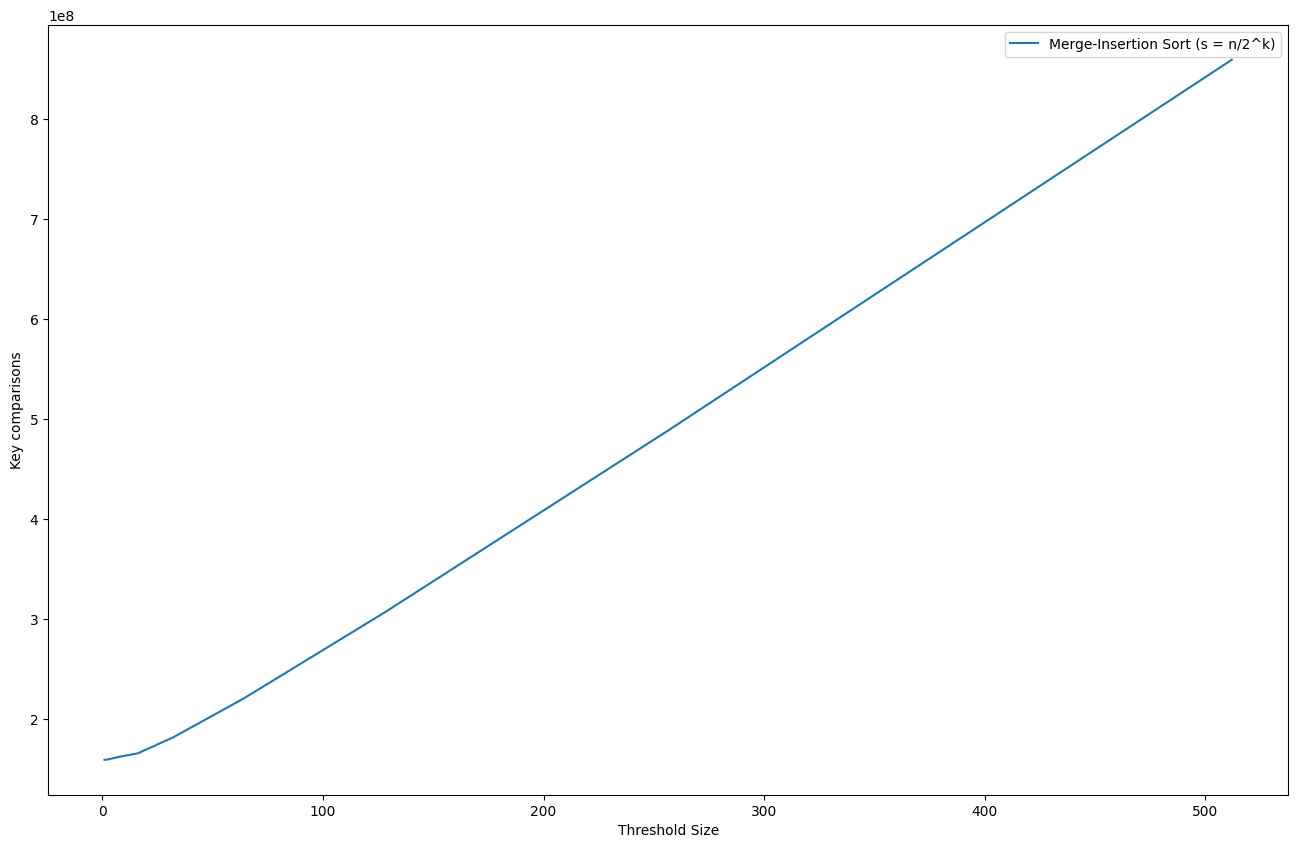

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 10)

sb.lineplot(data=data2, x='Threshold Size', y='Key comparisons', label='Merge-Insertion Sort (s = n/2^k)')